# Measuring Intrinsic Predictability
Created: 07/21/2024\
Updated: 07/21/2024

For model-free methods to measure the intrinsic forecastability of a time series, focusing on the intrinsic properties of the series without relying on specific models, you can use several approaches:

## 1. Entropy-Based Measures
Entropy-based methods provide insights into the complexity and regularity of the time series. Lower entropy indicates higher predictability.

### Approximate Entropy (ApEn)
Measures the regularity and complexity of time series data. A lower ApEn value indicates higher predictability.

### Sample Entropy (SampEn)
Similar to ApEn but more consistent for shorter time series. It measures the likelihood that similar patterns in the data will not repeat in the future.

### Permutation Entropy
Quantifies the complexity of the time series by considering the ordering of values. Lower values suggest higher predictability.

## 2. Mutual Information
Mutual Information measures the amount of information obtained about one variable through another. For time series, you can compute the mutual information between past and future values.

$$
I(X_t; X_{t+\tau}) = \sum_{x_t} \sum_{x_{t+\tau}} p(x_t, x_{t+\tau}) \log \left(\frac{p(x_t, x_{t+\tau})}{p(x_t)p(x_{t+\tau})}\right)
$$

Higher mutual information indicates higher predictability.

## 3. Lyapunov Exponent
The Lyapunov exponent measures the rate at which nearby trajectories in the system diverge. For time series:
- Negative Lyapunov exponent: Indicates predictability.
- Positive Lyapunov exponent: Indicates chaos and low predictability.

## 4. Correlation Dimension
The correlation dimension provides a measure of the dimensionality of the space occupied by the time series data. Lower correlation dimension suggests a more predictable series.

## 5. Hurst Exponent
The Hurst exponent ($H$) measures the long-term memory of a time series.

- $ 0.5 < H < 1 $: Indicates long-term positive autocorrelation (persistent behavior, more predictable).
- $ H = 0.5 $: Indicates a random walk (Brownian motion, less predictable).
- $ 0 < H < 0.5 $: Indicates long-term negative autocorrelation (anti-persistent behavior).

## 6. Recurrence Quantification Analysis (RQA)
RQA provides measures such as determinism, laminarity, and recurrence rate from the recurrence plot of the time series. Higher values of determinism and laminarity indicate more predictable behavior.

## Interpreting the Results

- **Lower Entropy Values**: Suggest a more predictable time series.
- **Higher Mutual Information**: Indicates higher predictability.
- **Negative Lyapunov Exponent**: Suggests the system is predictable.
- **Lower Correlation Dimension**: Indicates higher predictability.
- **Higher Hurst Exponent (0.5 < H < 1)**: Suggests a more predictable time series with persistent behavior.
- **Higher Determinism in RQA**: Indicates a more predictable time series.

These methods provide a comprehensive, model-free assessment of the intrinsic forecastability of a time series, focusing on its complexity, regularity, and inherent patterns.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy.stats import entropy

In [6]:
def approximate_entropy(U, m, r):
    """
    Calculate the approximate entropy of a time series.

    Parameters
    ----------
    U : array-like
        One-dimensional time series.
    m : int
        Embedding dimension.
    r : float
        Tolerance.

    Returns
    -------
    float
    
    """
    def _phi(m):
        x = np.array([U[i:i + m] for i in range(len(U) - m + 1)])
        C = np.sum(np.all(np.abs(x[:, None] - x[None, :]) <= r, axis=-1), axis=0) / (len(U) - m + 1)
        return np.sum(np.log(C)) / (len(U) - m + 1)
    
    return abs(_phi(m + 1) - _phi(m))


def mutual_information(time_series, lags=1, bins=30):
    """Calculate mutual information for a time series lagged with itself."""
    x = time_series[:-lags]
    y = time_series[lags:]
    # Joint histogram
    joint_hist, _, _ = np.histogram2d(x, y, bins=bins)
    joint_prob = joint_hist / np.sum(joint_hist)
    
    # Marginal histograms
    x_hist = np.sum(joint_hist, axis=1)
    y_hist = np.sum(joint_hist, axis=0)
    
    x_prob = x_hist / np.sum(x_hist)
    y_prob = y_hist / np.sum(y_hist)
    
    # Mutual information calculation
    joint_entropy = entropy(joint_prob.flatten())
    x_entropy = entropy(x_prob)
    y_entropy = entropy(y_prob)
    
    mi = x_entropy + y_entropy - joint_entropy
    return mi

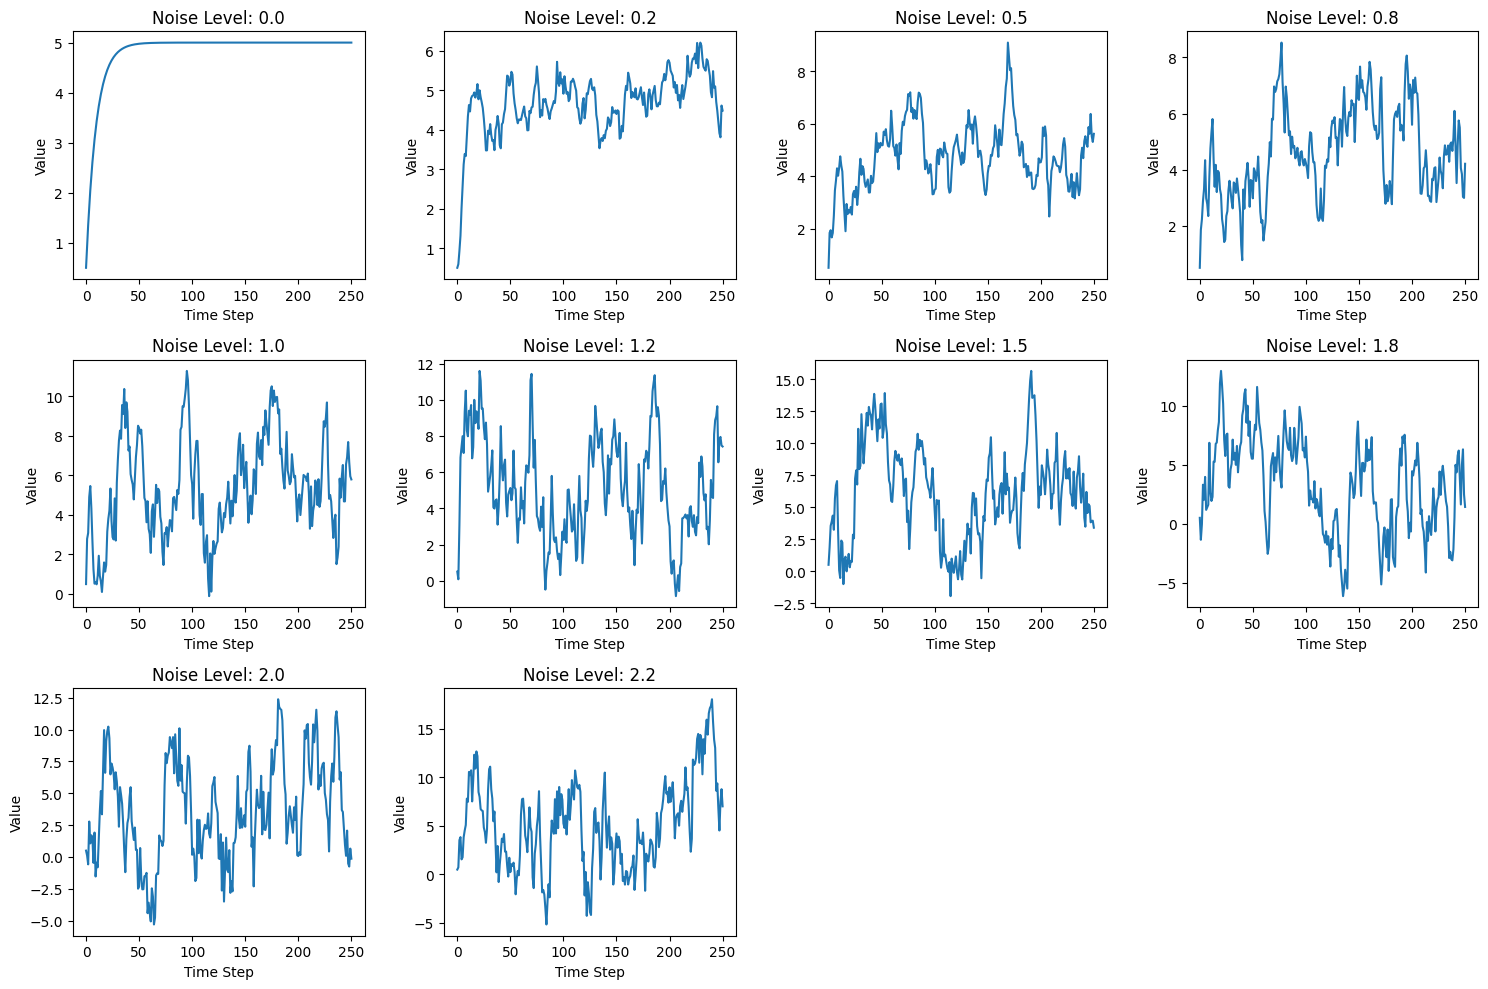

,noise_0_0,noise_0_25,noise_0_5,noise_0_75,noise_1_0,noise_1_25,noise_1_5,noise_1_75,noise_2_0,noise_2_25
0,0.50000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
1,0.95000,0.591485,1.836116,1.851267,2.790044,0.079372,1.856842,-1.362283,0.116367,0.727455
2,1.35500,0.926510,1.935353,2.226554,3.089848,3.094040,3.542999,-0.035203,-0.577282,3.538639
3,1.71950,1.312902,1.659173,2.883405,4.908282,6.802391,3.886613,3.308115,2.784214,3.849791
4,2.04755,2.005957,1.830966,3.308905,5.465536,7.408408,4.339223,2.036815,1.067960,1.552884
...,...,...,...,...,...,...,...,...,...,...
246,5.00000,4.206142,5.620201,4.053460,6.922571,6.544000,5.093076,1.630771,2.072770,6.812411
247,5.00000,3.915978,6.375067,3.841099,7.693468,7.822084,3.816839,4.984174,-0.507903,4.530442
248,5.00000,3.809581,5.525347,3.026142,6.674362,7.946443,3.929930,6.307484,-0.751674,7.520375
249,5.00000,4.614496,5.306550,2.990938,5.959158,7.468741,3.942458,2.479865,0.660630,8.790746


In [7]:
# Parameters
b0, b1 = .5, .9
n = 250
noise_levels = np.arange(0, 2.5, 0.25)  # Different levels of Gaussian noise
#noise_levels = [0, 1, 10, 0]
# Initialize the DataFrame
data = {}

# Generate time series for each noise level
for noise in noise_levels:
    ts = [b0]  # Starting value for the time series
    for t in range(1, n+1):
        epsilon_t = np.random.normal(0, noise)  # Gaussian noise
        x_t = b0 + b1 * ts[-1] + epsilon_t
        ts.append(x_t)
    data[f'noise_{noise}'.replace('.', '_')] = ts

# Create DataFrame with timesteps as columns
df = pd.DataFrame(data)
#df.columns = [f'timestep_{i}' for i in range(n_timesteps)]

n = len(noise_levels)
n_rows, n_cols = int(np.sqrt(n)), int(np.ceil(n / np.sqrt(n)))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))

for i, (col_name, ax) in enumerate(zip(df.columns, axes.flatten())):
    ax.plot(df.index, df[col_name])
    ax.set_title(f'Noise Level: {noise_levels[i]:.1f}')
    ax.set_xlabel('Time Step')
    ax.set_ylabel('Value')

# Hide any empty subplots
for ax in axes.flatten()[n:]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

# Display DataFrame
df

Noise Level: 0.00 - Approximate Entropy: 0.00134
Noise Level: 0.25 - Approximate Entropy: 0.04565
Noise Level: 0.50 - Approximate Entropy: 0.00432
Noise Level: 0.75 - Approximate Entropy: 0.00432
Noise Level: 1.00 - Approximate Entropy: 0.00432
Noise Level: 1.25 - Approximate Entropy: 0.00432
Noise Level: 1.50 - Approximate Entropy: 0.00432
Noise Level: 1.75 - Approximate Entropy: 0.00432
Noise Level: 2.00 - Approximate Entropy: 0.00432
Noise Level: 2.25 - Approximate Entropy: 0.00432


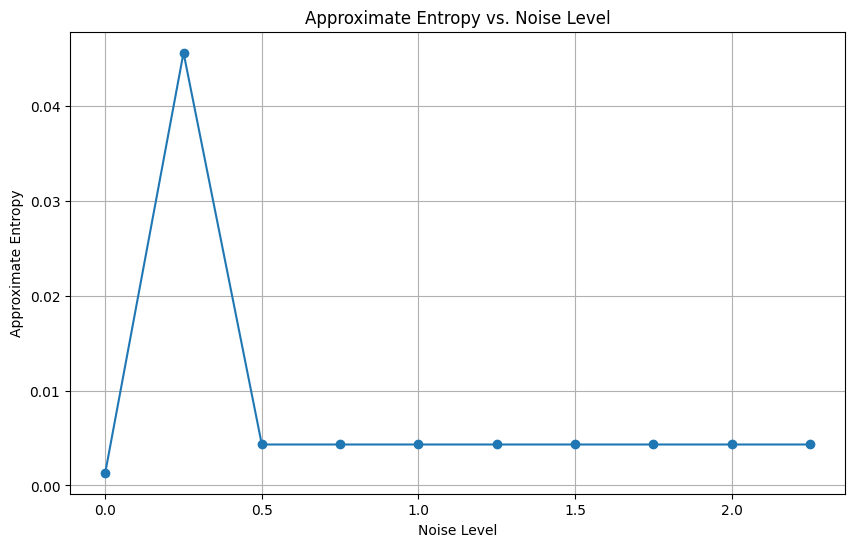

In [9]:
approximate_entropy_values = {}
for noise_level in noise_levels:
    ap_en = approximate_entropy(df[f'noise_{noise_level}'.replace('.', '_')], m=20, r=.5)
    print(f"Noise Level: {noise_level:.2f} - Approximate Entropy: {ap_en:.5f}")
    approximate_entropy_values[noise_level] = ap_en
plt.figure(figsize=(10, 6))
plt.plot(list(approximate_entropy_values.keys()), list(approximate_entropy_values.values()), marker='o')
plt.xlabel('Noise Level')
plt.ylabel('Approximate Entropy')
plt.title('Approximate Entropy vs. Noise Level')
plt.grid(True)
plt.show()

In [11]:
def fit_ar1_and_evaluate(series, train_ratio=0.8):
    n = len(series)
    train_size = int(n * train_ratio)
    
    # Split data into train and test sets
    train, test = series[:train_size], series[train_size:]
    test = test.reset_index(drop=True)  # Reset index for the test set
    
    # Initialize predictions and errors
    predictions = []
    actuals = []
    
    # Rolling window evaluation
    for t in range(len(test)):
        # Fit AR(1) model on expanding window
        y_train = series[:train_size + t]
        X_train = y_train[:-1]
        y_train = y_train[1:]
        
        # Fit AR(1) model (y_t = b0 + b1 * y_{t-1})
        b1, b0 = np.polyfit(X_train, y_train, 1)
        
        # Predict the next value
        y_pred = b0 + b1 * series[train_size + t - 1]
        predictions.append(y_pred)
        actuals.append(test[t])
    
    # Calculate performance metrics
    rmse = np.sqrt(mean_squared_error(actuals, predictions))
    mae = mean_absolute_error(actuals, predictions)
    mape = np.mean(np.abs((np.array(actuals) - np.array(predictions)) / np.array(actuals))) * 100
    
    return rmse, mae, mape

# Fit AR(1) model and evaluate for each series
results = {}
for column in df.columns:
    rmse, mae, mape = fit_ar1_and_evaluate(df[column])
    results[column] = {'RMSE': rmse, 'MAE': mae, 'MAPE': mape}

# Create a results DataFrame
results_df = pd.DataFrame(results).T.round(4)
results_df

,RMSE,MAE,MAPE
noise_0_0,0.0000,0.0000,0.0000
noise_0_25,0.2974,0.2425,4.6822
noise_0_5,0.5570,0.4303,10.3444
noise_0_75,0.7247,0.5791,13.8159
noise_1_0,1.1679,0.9023,20.0831
noise_1_25,1.2200,0.9278,66.2568
noise_1_5,1.5012,1.2704,20.6636
noise_1_75,1.8863,1.5617,160.0445
noise_2_0,1.8333,1.4902,118.2170
noise_2_25,2.2852,1.8582,21.8804


In [13]:
# mi for each level of noise
for noise_level in noise_levels:
    mi = mutual_information(df[f'noise_{noise_level}'.replace('.', '_')], lags=1, bins=30)
    print(f"Noise Level: {noise_level:.2f} - Mutual Information: {mi:.5f}")

Noise Level: 0.00 - Mutual Information: 0.75286
Noise Level: 0.25 - Mutual Information: 1.11037
Noise Level: 0.50 - Mutual Information: 1.29506
Noise Level: 0.75 - Mutual Information: 1.26467
Noise Level: 1.00 - Mutual Information: 1.40969
Noise Level: 1.25 - Mutual Information: 1.37986
Noise Level: 1.50 - Mutual Information: 1.38425
Noise Level: 1.75 - Mutual Information: 1.41070
Noise Level: 2.00 - Mutual Information: 1.35557
Noise Level: 2.25 - Mutual Information: 1.33844
